<a href="https://colab.research.google.com/github/RajamannarAanjaram/EVA-6/blob/mannar/gradcam_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/RajamannarAanjaram/EVA-6.git

Cloning into 'EVA-6'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 70 (delta 28), reused 57 (delta 21), pack-reused 0
Unpacking objects: 100% (70/70), done.


In [2]:
!pip install -U albumentations
!pip install -U torchsummary
!pip install -U grad-cam
!pip install -U ttach

     |████████████████████████████████| 102kB 7.0MB/s 
     |████████████████████████████████| 38.2MB 78kB/s 
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12
Requirement already up-to-date: torchsummary in /usr/local/lib/python3.7/dist-packages (1.5.1)
     |████████████████████████████████| 1.8MB 7.4MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.2.9-cp37-none-any.whl size=15651 sha256=4fdd803398a3314da0029649d89db35fb4a0fcbdc571ef489a43406a3452f00d
  Stored in directory: /root/.cache/pip/wheels/da/e2/53/c95f2b03cecab57f7d708a9f0a7b60b48533826c370947dce7
Successfully built grad-cam


In [3]:
import sys
sys.path.append("./EVA-6/")

In [4]:
from utils.DataLoader import Loader,mean_std,DeNorm
from src.models import *
from src.optimise import *
from src.plots import Plots
import matplotlib.pyplot as plt
from utils.helper import get_mean_std


from pytorch_grad_cam import GradCAM, XGradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image


# import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [5]:
loader = Loader(batch_size=256)
train_transform,test_transform = loader.transform()
train_data,test_data = loader.Loader(train_transform,test_transform, cuda=False)

======> Computing mean and std of dataset



Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 390/390 [00:16<00:00, 23.14it/s]


Files already downloaded and verified
Files already downloaded and verified


In [8]:
model, summary = ModelLoader.modelsummary(version=[2,2,2,2],inputsize=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [9]:
use_cuda = torch.cuda.is_available()
device = 'cuda:0' if use_cuda else 'cpu'

In [10]:
(train_acc, train_losses, test_acc, test_losses), modelfinal = learner(model,train_data,test_data,
                                                                       epochs=20,optimiser= 'Adam',
                                                                       scheduler=False,device = device)

  0%|          | 0/196 [00:00<?, ?it/s]

Epoch 1:


Loss=1.8799186944961548 Batch_id=195 Accuracy=16.91: 100%|██████████| 196/196 [01:05<00:00,  3.01it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.8854, Accuracy: 13187/50000 (26.37%)

Epoch 2:


Loss=1.6734864711761475 Batch_id=195 Accuracy=32.38: 100%|██████████| 196/196 [01:05<00:00,  2.98it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.6157, Accuracy: 20676/50000 (41.35%)

Epoch 3:


Loss=1.4430805444717407 Batch_id=195 Accuracy=43.71: 100%|██████████| 196/196 [01:06<00:00,  2.95it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.3814, Accuracy: 24777/50000 (49.55%)

Epoch 4:


Loss=1.2393690347671509 Batch_id=195 Accuracy=50.58: 100%|██████████| 196/196 [01:06<00:00,  2.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.2236, Accuracy: 28049/50000 (56.10%)

Epoch 5:


Loss=1.2841852903366089 Batch_id=195 Accuracy=55.65: 100%|██████████| 196/196 [01:07<00:00,  2.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 1.0915, Accuracy: 30370/50000 (60.74%)

Epoch 6:


Loss=1.0140072107315063 Batch_id=195 Accuracy=60.07: 100%|██████████| 196/196 [01:07<00:00,  2.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.9100, Accuracy: 33776/50000 (67.55%)

Epoch 7:


Loss=0.8620443344116211 Batch_id=195 Accuracy=64.08: 100%|██████████| 196/196 [01:07<00:00,  2.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.9178, Accuracy: 34461/50000 (68.92%)

Epoch 8:


Loss=0.9976711273193359 Batch_id=195 Accuracy=67.39: 100%|██████████| 196/196 [01:07<00:00,  2.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6995, Accuracy: 37642/50000 (75.28%)

Epoch 9:


Loss=0.7716830372810364 Batch_id=195 Accuracy=70.07: 100%|██████████| 196/196 [01:07<00:00,  2.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6269, Accuracy: 38908/50000 (77.82%)

Epoch 10:


Loss=0.700926661491394 Batch_id=195 Accuracy=73.08: 100%|██████████| 196/196 [01:07<00:00,  2.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.6100, Accuracy: 39475/50000 (78.95%)

Epoch 11:


Loss=0.5290087461471558 Batch_id=195 Accuracy=74.84: 100%|██████████| 196/196 [01:07<00:00,  2.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.4724, Accuracy: 41831/50000 (83.66%)

Epoch 12:


Loss=0.6101979613304138 Batch_id=195 Accuracy=76.16: 100%|██████████| 196/196 [01:07<00:00,  2.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.4417, Accuracy: 42435/50000 (84.87%)

Epoch 13:


Loss=0.5767677426338196 Batch_id=195 Accuracy=77.80: 100%|██████████| 196/196 [01:07<00:00,  2.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.4556, Accuracy: 41933/50000 (83.87%)

Epoch 14:


Loss=0.6792159676551819 Batch_id=195 Accuracy=78.97: 100%|██████████| 196/196 [01:07<00:00,  2.90it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.3511, Accuracy: 44012/50000 (88.02%)

Epoch 15:


Loss=0.5124790072441101 Batch_id=195 Accuracy=80.18: 100%|██████████| 196/196 [01:07<00:00,  2.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.4059, Accuracy: 42994/50000 (85.99%)

Epoch 16:


Loss=0.47546640038490295 Batch_id=195 Accuracy=80.91: 100%|██████████| 196/196 [01:07<00:00,  2.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.3403, Accuracy: 44000/50000 (88.00%)

Epoch 17:


Loss=0.8838708996772766 Batch_id=195 Accuracy=82.12: 100%|██████████| 196/196 [01:06<00:00,  2.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.3114, Accuracy: 44427/50000 (88.85%)

Epoch 18:


Loss=0.48084479570388794 Batch_id=195 Accuracy=82.32: 100%|██████████| 196/196 [01:07<00:00,  2.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.2722, Accuracy: 45357/50000 (90.71%)

Epoch 19:


Loss=0.3667390048503876 Batch_id=195 Accuracy=83.36: 100%|██████████| 196/196 [01:07<00:00,  2.92it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.2626, Accuracy: 45441/50000 (90.88%)

Epoch 20:


Loss=0.35920771956443787 Batch_id=195 Accuracy=84.20: 100%|██████████| 196/196 [01:07<00:00,  2.92it/s]



Test set: Average loss: 0.2541, Accuracy: 45664/50000 (91.33%)



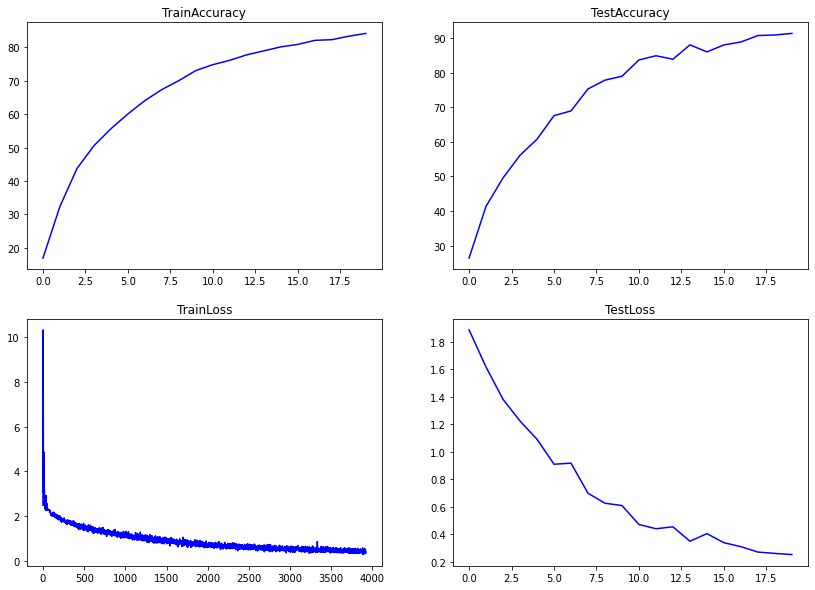

In [12]:
Plots.stat_graph(train_acc, train_losses, test_acc, test_losses)

Total wrong predictions are 4336


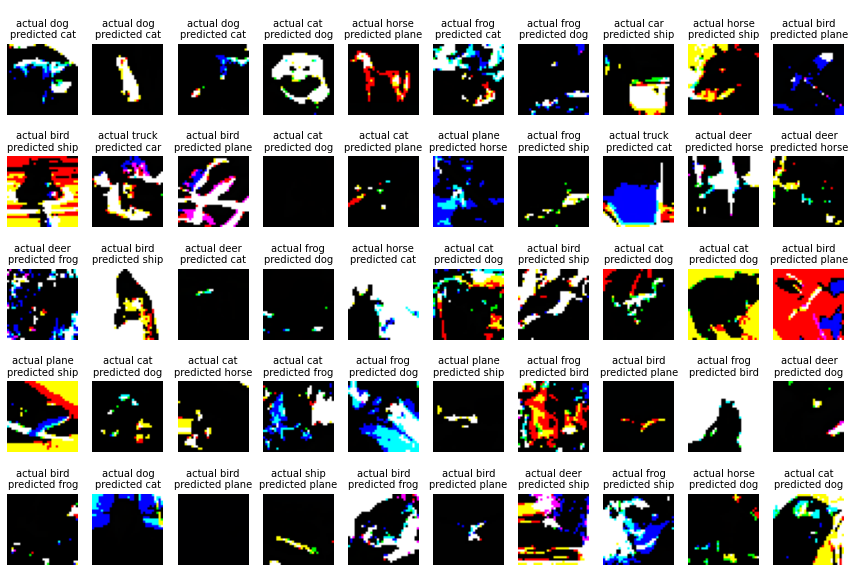

In [11]:
Plots.miscImages(modelfinal,test_data,device)
plt.show()

In [13]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in test_data:
        images, labels = data
        images = images["image"].to(device)
        labels = labels.to(device)
        outputs = modelfinal(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 91 %
Accuracy of   car : 97 %
Accuracy of  bird : 87 %
Accuracy of   cat : 89 %
Accuracy of  deer : 92 %
Accuracy of   dog : 87 %
Accuracy of  frog : 98 %
Accuracy of horse : 98 %
Accuracy of  ship : 100 %
Accuracy of truck : 87 %


In [14]:
# using layer 3 as it's 8x8 in width & height
target_layer = model.layer3[-1]

# Construct the CAM object once, and then re-use it on many images:
cam =  GradCAM(model=model, target_layer=target_layer, use_cuda=device)
denorm = DeNorm()

======> Computing mean and std of dataset
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
100%|██████████| 390/390 [00:05<00:00, 71.37it/s]


In [19]:
def plot_g_cam(cam,images,target_category,denorm):
        
    # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_tensor=images, target_category=target_category,aug_smooth=True,eigen_smooth=False)
    
    plot_images = torch.clone(images).detach() # Create Copy of Input Images
    denorm_image_list = list(map(denorm,plot_images)) # Denormalise Images
    denorm_tensor = torch.stack(denorm_image_list,dim=0) # Create Batched Tensor
    
    # Change order for Plotting
    rgb_tensor  = denorm_tensor.permute(0, 2, 3, 1).cpu().numpy() 
    images = images.permute(0, 2, 3, 1).cpu().numpy()
    

    num_images = images.shape[0]
    fig = plt.figure(figsize=(8,8))
    # fig.tight_layout()
    layout_id =1 
    
    
    for idx,(img,img_cam) in enumerate(zip(images,grayscale_cam)) : 
        
        visualization = show_cam_on_image(rgb_tensor[idx], img_cam) #Pass Denorm Image for SuperImposing
        
        # Normal Images Plot
        ax = fig.add_subplot(num_images, 2, layout_id)
        ax.axis('off')
        
        ax.set_title("Actual Image")
        ax.imshow(img.astype(np.uint8),cmap='gray_r', vmin=0, vmax=255)
        layout_id+=1

        # Cam Output Plot
        ax = fig.add_subplot(num_images, 2, layout_id)
        ax.axis('off')
        ax.set_title("Cam Image")
        ax.imshow(visualization.astype(np.uint8),cmap='gray_r', vmin=0, vmax=255)
        layout_id+=1

In [17]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


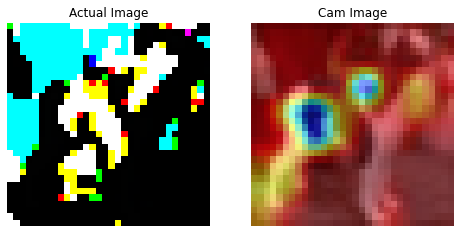

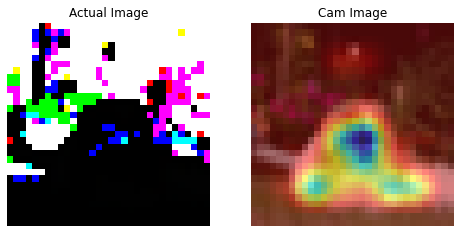

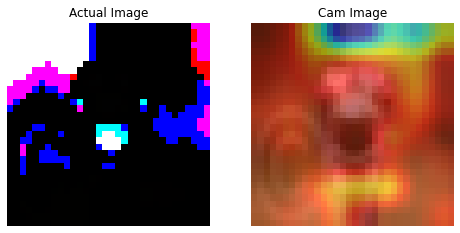

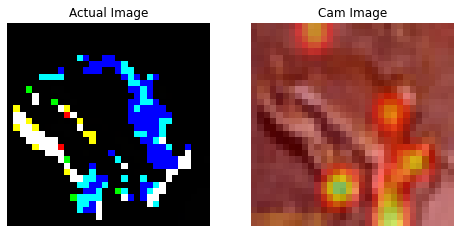

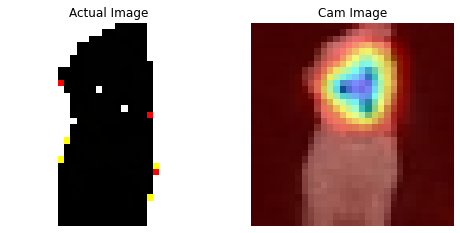

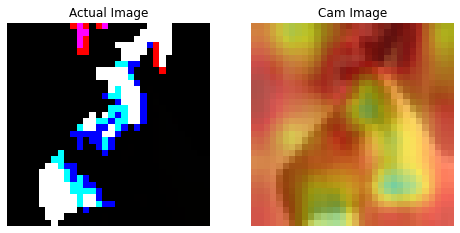

In [20]:
for im in images[:6]:
    plot_g_cam(cam,im.unsqueeze(dim=0),None,denorm)